LSTM model with covariates structured into it

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [0]:
import pandas as pd
caisofile= 'CaisoJan19March19windsolarAvg.csv'
caiso_dataset = pd.read_csv(caisofile)


In [0]:
caiso_dataset.head()

,DateTime,level
0,2019-01-01 00:00:00,-2.333
1,2019-01-01 01:00:00,-2.333
2,2019-01-01 02:00:00,-2.333
3,2019-01-01 03:00:00,-2.667
4,2019-01-01 04:00:00,-3.000


In [0]:
caiso_dataset = caiso_dataset.rename(columns={'ws_forecast (avg) (california_iso)': 'level'})

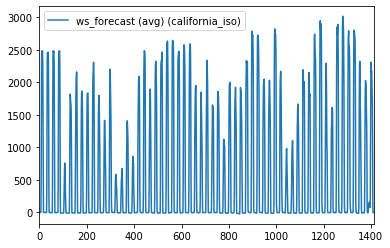

In [0]:
caiso_dataset.plot()

In [0]:
import numpy as np
np.max(caiso_dataset['level'])
# max in order to normalize the prediction accuracy

3017.0

In [0]:
caiso_seq =  caiso_dataset['level']

In [0]:
from numpy import *

In [0]:

# split univar seq into lagged samples
# nsteps is the lag value

def split_seq(sequence, nsteps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find end of pattern
    end_patt = i + nsteps
    if end_patt > len(sequence)-1:
      break
    seq_x = sequence[i:end_patt]
    seq_y = sequence[end_patt]
    X.append(seq_x)
    y.append(seq_y)
    
  return array(X), array(y)

In [0]:
caiso_X, caiso_y = split_seq(caiso_seq, 3) # lag value: 3

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

LSTM # 1 


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

# vanilla LSTM
nsteps = 1
nfeatures = 3
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(nfeatures, nsteps))) : for method with train_test_split 
model.add(LSTM(50, activation='relu', input_shape=(nsteps, nfeatures)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(caiso_X, caiso_y, test_size=0.3)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
# vanilla LSTM, diff. dimensions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

# vanilla LSTM
nsteps = 3
nfeatures = 1
vanillamodel = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(nfeatures, nsteps))) : for method with train_test_split 
vanillamodel.add(LSTM(50, activation='relu', input_shape=(nsteps, nfeatures)))
vanillamodel.add(Dense(1))
vanillamodel.compile(optimizer='adam', loss='mse')

In [57]:
Xs = caiso_X
ys = caiso_y
nfeatures= 1 
# reshape X 
Xs = Xs.reshape((Xs.shape[0], Xs.shape[1], nfeatures))
vanillamodel.fit(Xs, ys, epochs=10)

Epoch 1/10
1412/1412 [==============================] - 0s 229us/step - loss: 1030839.8985
Epoch 2/10
1412/1412 [==============================] - 0s 80us/step - loss: 587568.3038
Epoch 3/10
1412/1412 [==============================] - 0s 78us/step - loss: 197879.5349
Epoch 4/10
1412/1412 [==============================] - 0s 73us/step - loss: 131623.1443
Epoch 5/10
1412/1412 [==============================] - 0s 81us/step - loss: 93741.6869
Epoch 6/10
1412/1412 [==============================] - 0s 77us/step - loss: 74618.1548
Epoch 7/10
1412/1412 [==============================] - 0s 75us/step - loss: 51830.4922
Epoch 8/10
1412/1412 [==============================] - 0s 75us/step - loss: 55257.7074
Epoch 9/10
1412/1412 [==============================] - 0s 74us/step - loss: 53370.5585
Epoch 10/10
1412/1412 [==============================] - 0s 74us/step - loss: 38042.0971


In [0]:
# demonstrate prediction
x_input = array([70, 80, 90]) #100, 110, 120, 130, 140
x_input = x_input.reshape((1, nsteps,nfeatures))
yhat = model.predict(x_input)

In [43]:
yhat

array([[1.438202]], dtype=float32)

In [0]:
root_mean_squared_error(1168.61,2109)

940.3900000000001

error of forecasted 
https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

https://arxiv.org/pdf/1809.03006.pdf


In [0]:
940.39/3017 # normalize the error

0.31169705004971826

In [0]:
import numpy as np
def root_mean_squared_error(y_true, y_pred):
  return np.sqrt(np.mean(np.square(y_pred - y_true)))

keras: set weights for ea layer:

set_weights(weights)

LSTM #2 : Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another = stacked LSTM

More LSTM parameters: (https://keras.io/layers/recurrent/)

use_bias: Boolean, whether the layer uses a bias vector \\
kernel_initializer  \\
recurrent_initializer \\
bias_initializer \\
unit_forget_bias \\

kernel_constraint, recurrent_constraint \\
bias_constraint: Constraint function applied to the bias vector (see constraints).

dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.

return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.



In [54]:
stacked_model = Sequential()

nunits = 50
n_steps= 3
n_features=1
# LSTM ( units,activation, recurrent_activation)
# recurrent_activation: Activation function to use for the recurrent step (see activations). Default: hard sigmoid (hard_sigmoid
stacked_model.add(LSTM(nunits, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
stacked_model.add(LSTM(nunits, activation='relu'))
stacked_model.add(Dense(1))
stacked_model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# prediction sample demonstration
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_features, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)


Train on 988 samples, validate on 424 samples
Epoch 1/10
988/988 [==============================] - 0s 61us/step - loss: 27196.4596 - val_loss: 39177.7670
Epoch 2/10
988/988 [==============================] - 0s 70us/step - loss: 28198.2364 - val_loss: 40617.9303
Epoch 3/10
988/988 [==============================] - 0s 59us/step - loss: 28286.8205 - val_loss: 43789.8749
Epoch 4/10
988/988 [==============================] - 0s 58us/step - loss: 30830.5209 - val_loss: 45440.3045
Epoch 5/10
988/988 [==============================] - 0s 59us/step - loss: 37042.5545 - val_loss: 37127.3047
Epoch 6/10
988/988 [==============================] - 0s 60us/step - loss: 30452.2900 - val_loss: 47600.5764
Epoch 7/10
988/988 [==============================] - 0s 70us/step - loss: 33270.3755 - val_loss: 46640.5881
Epoch 8/10
988/988 [==============================] - 0s 59us/step - loss: 28126.2247 - val_loss: 39480.5425
Epoch 9/10
988/988 [==============================] - 0s 57us/step - loss: 28892.1

covariate method 3: try to put it in the last layer  of LSTM

Documentation from https://keras.io/getting-started/functional-api-guide/




In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# vanilla LSTM
nsteps = 3
nfeatures = 1
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(nfeatures, nsteps))) : for method with train_test_split 
model.add(LSTM(50, activation='relu', input_shape=(nsteps, nfeatures)))
model.add(Dense(1))

# sequence of 3 numbers
main_input = Input(shape=(3,), dtype='float32', name='main_input')
# embedding layer encodes input sequence into seq of d-diml vectors
d = 50
x_emb = Embedding(output_dim=d, input_dim=3000, input_length=3)(main_input)
lstm_out = LSTM(50)(x_emb)

auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

# auxiliary_input is covariates                                                             
auxiliary_input= Input(shape=(3,), name='aux_input')

layer_aux = keras.layers.concatenate([lstm_out, auxiliary_input])


# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(layer_aux)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', loss_weights=[1., 0.2])
#model.compile(optimizer='adam', loss='mse')


bidirectional LsTm


In [41]:
from keras.layers import Bidirectional
bidir_model = Sequential()
n_steps=1
n_features =3
bidir_model.add(Bidirectional(LSTM(10, activation='relu'), input_shape=(n_steps, n_features)))
bidir_model.add(Dense(1))
bidir_model.compile(optimizer='adam', loss='mse')


# fit model
bidir_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


# prediction sample demonstration
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = bidir_model.predict(x_input, verbose=0)
print(yhat)


Train on 988 samples, validate on 424 samples
Epoch 1/10
988/988 [==============================] - 1s 571us/step - loss: 781457.4899 - val_loss: 675370.7406
Epoch 2/10
988/988 [==============================] - 0s 76us/step - loss: 662117.2315 - val_loss: 552152.1663
Epoch 3/10
988/988 [==============================] - 0s 74us/step - loss: 543855.9997 - val_loss: 437261.3691
Epoch 4/10
988/988 [==============================] - 0s 75us/step - loss: 431340.4677 - val_loss: 327326.3449
Epoch 5/10
988/988 [==============================] - 0s 76us/step - loss: 316356.7516 - val_loss: 212985.2282
Epoch 6/10
988/988 [==============================] - 0s 72us/step - loss: 179729.5179 - val_loss: 151361.4872
Epoch 7/10
988/988 [==============================] - 0s 72us/step - loss: 126581.8124 - val_loss: 95367.7286
Epoch 8/10
988/988 [==============================] - 0s 73us/step - loss: 107348.6276 - val_loss: 108042.3497
Epoch 9/10
988/988 [==============================] - 0s 74us/step